In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('apy.csv')
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [3]:
maharashtra = df.groupby('State_Name').get_group('Maharashtra')

In [4]:
maharashtra.describe()

,Crop_Year,Area,Production
count,12628.000000,12628.000000,1.249600e+04
mean,2005.230519,25515.223076,1.011236e+05
std,5.047317,59098.998465,7.303716e+05
min,1997.000000,1.000000,0.000000e+00
25%,2001.000000,500.000000,3.000000e+02
50%,2005.000000,3400.000000,2.600000e+03
75%,2010.000000,23100.000000,2.160000e+04
max,2014.000000,726300.000000,2.004970e+07


In [5]:
maharashtra['Crop'].unique()

array(['Maize', 'Arhar/Tur', 'Bajra', 'Gram', 'Jowar',
       'Moong(Green Gram)', 'Pulses total', 'Ragi', 'Rice', 'Sugarcane',
       'Total foodgrain', 'Urad', 'Other  Rabi pulses', 'Wheat',
       'Cotton(lint)', 'Castor seed', 'Groundnut', 'Niger seed',
       'Other Cereals & Millets', 'Other Kharif pulses', 'Sesamum',
       'Soyabean', 'Sunflower', 'Linseed', 'Rapeseed &Mustard',
       'Safflower', 'Small millets', 'other oilseeds', 'Banana', 'Grapes',
       'Mango', 'Onion', 'Tomato', 'Tobacco'], dtype=object)

In [17]:
maharashtra.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
125191,Maharashtra,AHMEDNAGAR,1997,Autumn,Maize,1.0,1113.0
125192,Maharashtra,AHMEDNAGAR,1997,Kharif,Arhar/Tur,17600.0,6300.0
125193,Maharashtra,AHMEDNAGAR,1997,Kharif,Bajra,274100.0,152800.0
125194,Maharashtra,AHMEDNAGAR,1997,Kharif,Gram,40800.0,18600.0
125195,Maharashtra,AHMEDNAGAR,1997,Kharif,Jowar,900.0,1100.0


In [7]:
maharashtra['Production'].isnull().sum()

132

<AxesSubplot:>

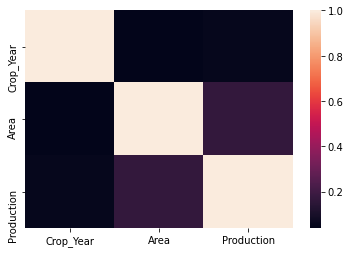

In [8]:
sns.heatmap(maharashtra.corr())

C:\Users\91992\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


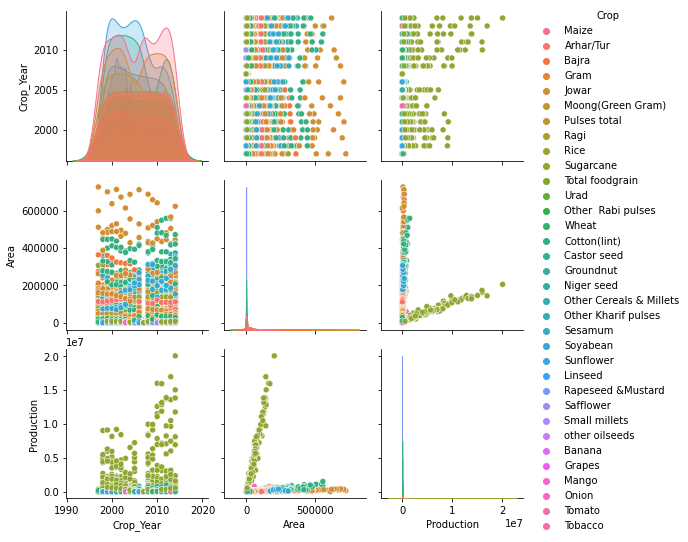

In [9]:
sns.pairplot(maharashtra,hue='Crop')

Text(0, 0.5, 'Crops')

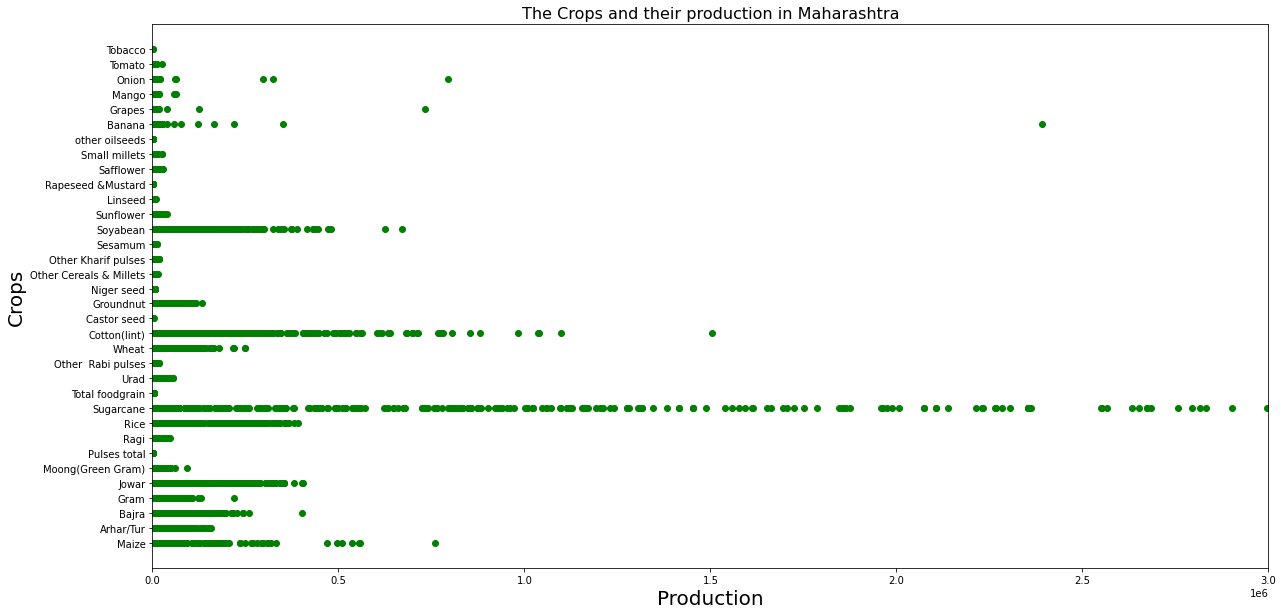

In [10]:

plt.figure(figsize=(20,10))
plt.scatter(maharashtra['Production'].fillna(1),maharashtra.Crop,color = 'green')
plt.xlim(0 ,3000000)
plt.title('The Crops and their production in Maharashtra',fontsize=16)
plt.xlabel('Production',fontsize=20)
plt.ylabel('Crops',fontsize=20)

(0.0, 2000000.0)

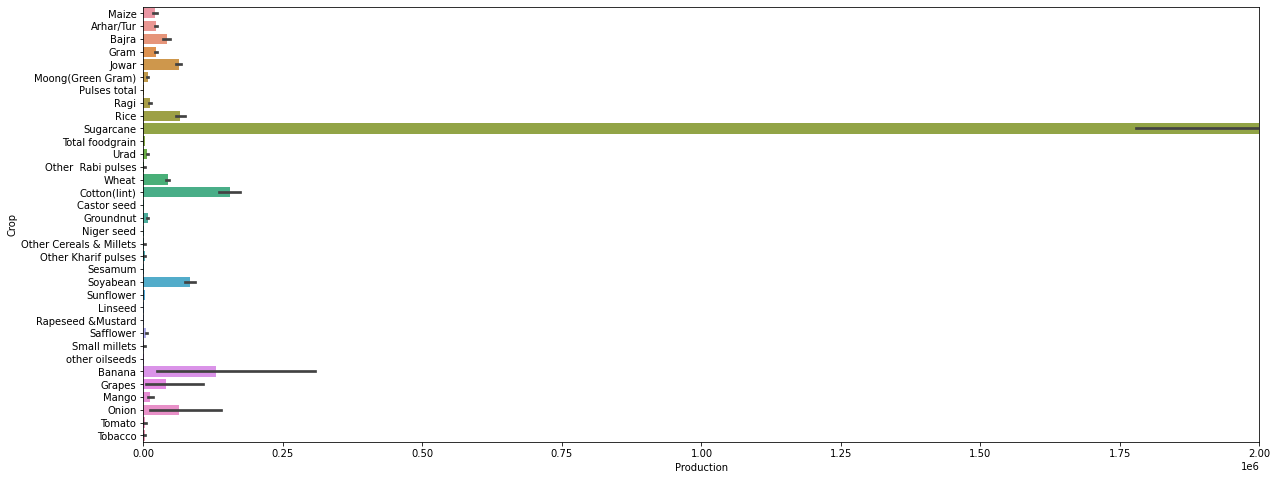

In [11]:
plt.figure(figsize=(20,8))
sns.barplot(data = maharashtra,x = 'Production',y='Crop')
plt.xlim(0 ,2000000)

As we can see in above graph the sugacane production is almost 95%
and other are 5% so it difficult to see accurate values of other crops
that why i am plot seperate graph of sugarcane and other crops

In [12]:
PUNE = df.groupby('District_Name').get_group('PUNE')
SOLAPUR = df.groupby('District_Name').get_group('SOLAPUR')
AHMEDNAGAR = df.groupby('District_Name').get_group('AHMEDNAGAR')
SATARA = df.groupby('District_Name').get_group('SATARA')

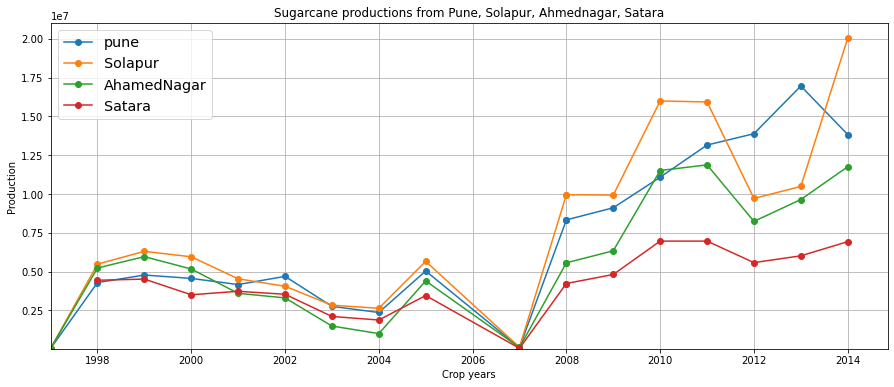

In [13]:
A=PUNE.groupby('Crop').get_group('Sugarcane')
B=SOLAPUR.groupby('Crop').get_group('Sugarcane')
C=AHMEDNAGAR.groupby('Crop').get_group('Sugarcane')
D=SATARA.groupby('Crop').get_group('Sugarcane')

plt.figure(figsize=(15,6))
plt.plot(A.Crop_Year,A.Production,label = 'pune',marker = 'o')
plt.plot(B.Crop_Year,B.Production,label = 'Solapur',marker = 'o')
plt.plot(C.Crop_Year,C.Production,label = 'AhamedNagar',marker = 'o')
plt.plot(D.Crop_Year,D.Production,label = 'Satara',marker = 'o')
plt.xlim(1997)
plt.ylim(bottom = 20000)
plt.xlabel('Crop years')
plt.ylabel('Production')
plt.title('Sugarcane productions from Pune, Solapur, Ahmednagar, Satara')
plt.grid(True)
plt.legend(fontsize = 'x-large')

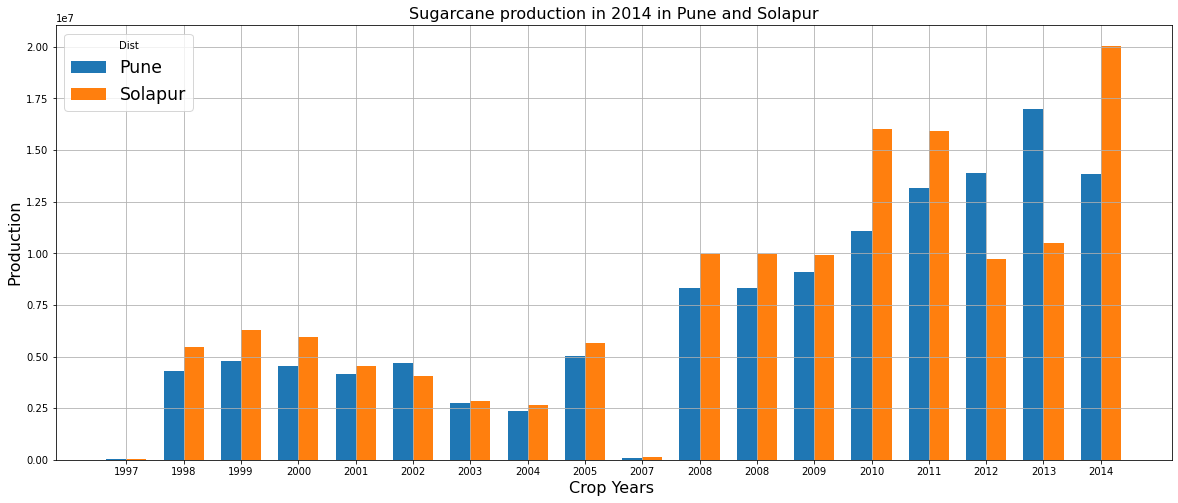

In [14]:
plt.figure(figsize=(20,8))
yax = np.arange(len(A.Production))
ind = np.arange(len(A.Crop_Year)) 
width = 0.35       
plt.bar(ind, A.Production, width, label='Pune')
plt.bar(ind + width, B.Production, width,label='Solapur')

plt.ylabel('Production',fontsize = 16)
plt.title('Sugarcane production in 2014 in Pune and Solapur',fontsize = 16)
plt.xlabel('Crop Years ',fontsize = 16)
plt.xticks(ind + width /2,A.Crop_Year)
plt.legend(loc='best',
          title='Dist',
          fontsize = 'xx-large')
plt.grid(True)


Text(0, 0.5, 'Production')

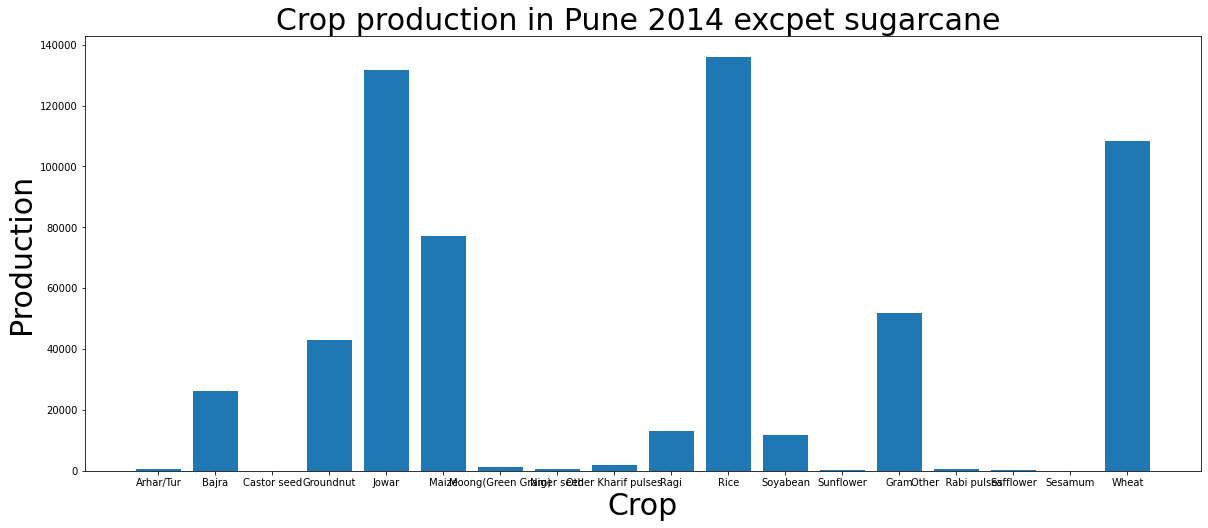

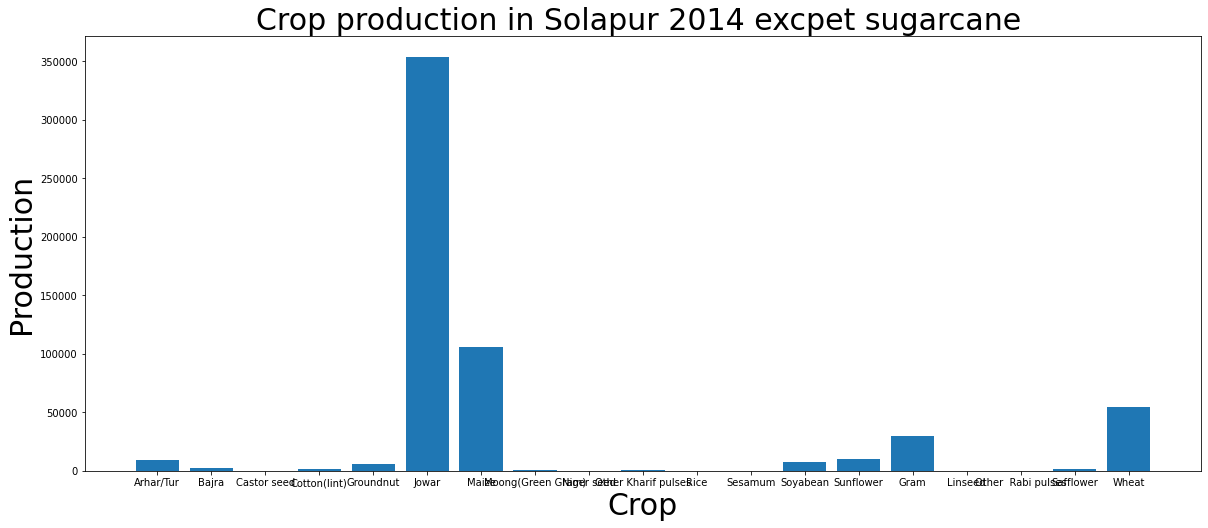

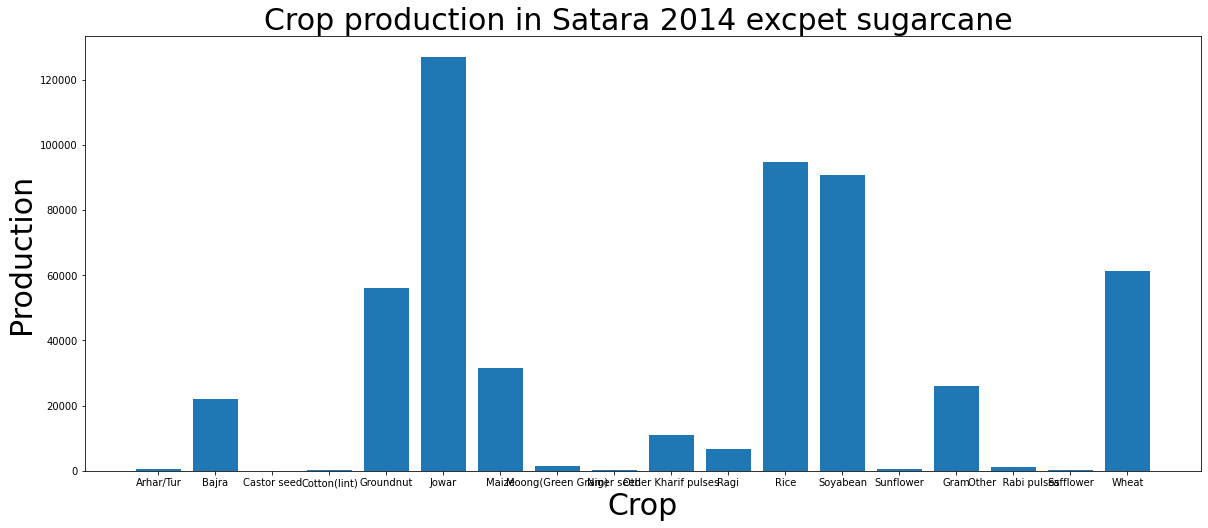

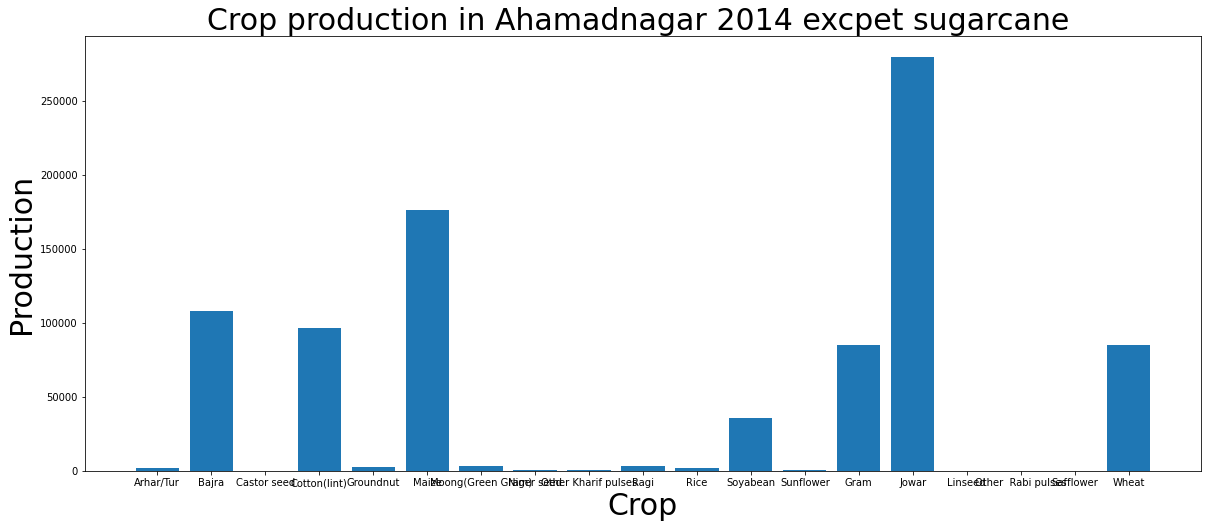

In [15]:

P=PUNE.groupby('Crop_Year').get_group(2014)
Q=SOLAPUR.groupby('Crop_Year').get_group(2014)
R=SATARA.groupby('Crop_Year').get_group(2014)
S=AHMEDNAGAR.groupby('Crop_Year').get_group(2014)

L= P.loc[134491:134513]
M =Q.loc[136534:136557]
O = R.loc[135870:135892]
B = S.loc[125662:125684]
plt.subplots(figsize=(20,8))
plt.bar(L.Crop,L.Production)
plt.title('Crop production in Pune 2014 excpet sugarcane ',fontsize=30)
plt.xlabel('Crop',fontsize=30)
plt.ylabel('Production',fontsize=30)



plt.subplots(figsize=(20,8))
plt.bar(M.Crop,M.Production)
plt.title('Crop production in Solapur 2014 excpet sugarcane ',fontsize=30)
plt.xlabel('Crop',fontsize=30)
plt.ylabel('Production',fontsize=30)


plt.subplots(figsize=(20,8))
plt.bar(O.Crop,O.Production)
plt.title('Crop production in Satara 2014 excpet sugarcane ',fontsize=30)
plt.xlabel('Crop',fontsize=30)
plt.ylabel('Production',fontsize=30)



plt.subplots(figsize=(20,8))
plt.bar(B.Crop,B.Production)
plt.title('Crop production in Ahamadnagar 2014 excpet sugarcane ',fontsize=30)
plt.xlabel('Crop',fontsize=30)
plt.ylabel('Production',fontsize=30)




Text(0.5, 1.0, 'Occupied Areas by crops ')

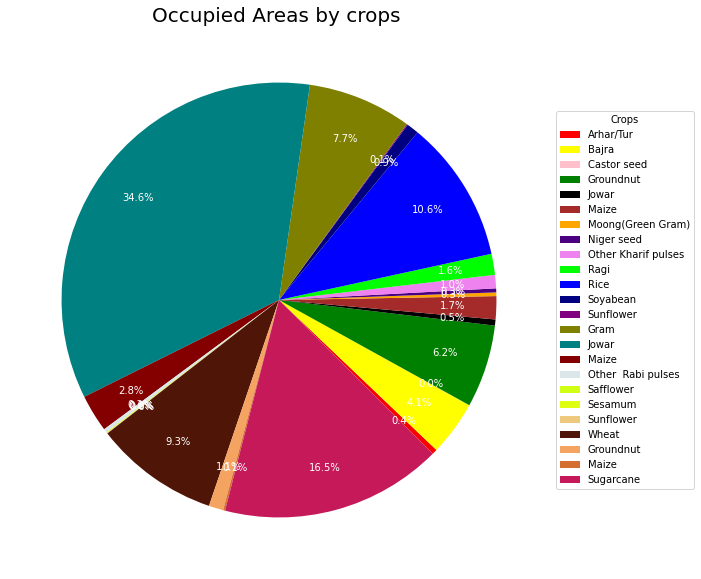

In [16]:

fig, ax = plt.subplots(figsize=(15, 10))
colors = ['red','yellow','pink','green','black','brown','orange','indigo','violet','lime','blue','navy','purple','olive'
         ,'teal','#840000','#dae6e9','#d0ff14','#dfff11','#eec87c','#4f1507','#f4a460','#d46f31','#c51959','#f7d6cb','#ed0dd9'
         '#46295a','#606865','#3a514d','#7a1f3d']
ax.pie(P.Area, autopct='%1.1f%%',textprops=dict(color="w"),pctdistance=0.8,colors = colors,startangle = -45)

ax.legend(P.Crop,title="Crops",loc="center left",bbox_to_anchor=(1, 0, 5, 1))

plt.title('Occupied Areas by crops ',fontsize = 20)
